# CS 109A/AC 209A/STAT 121A Data Science: Project Milestone 4/5
**Harvard University**<br>
**Fall 2016**<br>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import grid_search
from sklearn.decomposition import PCA
from sklearn import feature_selection as fs
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Step 1: Explore and Clean Data

First task will be to read, explore, and clean the data.


In [2]:
#Load and inspect the ncds data
ncds_data = pd.read_csv('datasets/ncds0123.txt', delimiter='\t', low_memory=False)
# Print shapes
print "Shape of data:", ncds_data.shape
ncds_data.head()

Shape of data: (18558, 1765)


,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,n1849,dvht07,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16
0,N10001N,2,9,9,9,9,23,4,2,12,...,-1,1.21899986267032,1.47299957275415,1.59999942779607,110.347991943347,98.1929931640604,105.055999755876,25.8549957275385,37.6489868164152,56.0199890136717
1,N10002P,1,9,8,8,8,34,4,5,1,...,-1,1.34599971771224,-1,-1,90.865997314449,-1,-1,26.3089904785155,-1,-1
2,N10003Q,1,4,4,4,4,34,4,10,1,...,-1,1.32099914550831,1.49899959564243,1.87999916076665,87.9599914550983,96.4049987792867,89.382995605487,24.4939880371087,38.1019897460905,66.6799926757659
3,N10004R,2,1,1,1,1,26,4,11,1,...,-1,1.29499912262003,1.51099967956562,1.62999916076665,105.16198730471,111.588989257796,132.054992675766,28.122985839843,45.8139953613169,72.7999877929584
4,N10005S,2,10,10,10,10,25,4,1,3,...,-1,1.34599971771224,-1,-1,129.382995605487,-1,-1,37.6489868164152,-1,-1


In [3]:
#Load and inspect the pms additions data
ncds_pms_data = pd.read_csv('datasets/ncds_pms_additionals.txt', delimiter='\t', low_memory=False)
# Print shapes
print "Shape of data:", ncds_pms_data.shape
ncds_pms_data.head()

Shape of data: (16990, 54)


,NCDSID,N622,BSTATUS,POD,BOOKING,PLANC,DIASTOL,MAXDBP,ALBECL,XRAY,...,DTB8,DTB9,DTB10,ILLNESS,MOD,TOD,AAD,SBNND,PLCWGT,TABLE62
0,N10001N,2,0,8,8,2,1,1,0,0,...,0,0,0,0,0,-1,-1,-1,-2,-1
1,N10002P,1,0,2,0,4,4,3,0,0,...,0,0,0,0,0,-1,-1,-1,-2,-1
2,N10003Q,1,0,8,8,2,1,3,0,0,...,0,0,1,3,0,-1,-1,-1,-2,-1
3,N10004R,2,0,8,8,2,1,-8,-8,1,...,1,0,0,-1,0,-1,-1,-1,-2,-1
4,N10005S,2,0,8,8,2,1,3,0,1,...,0,0,0,0,0,-1,-1,-1,-2,-1


In [4]:
#Load and inspect the response data
ncds_response_data = pd.read_csv('datasets/ncds_response.txt', delimiter='\t', low_memory=False)
# Print shapes
print "Shape of data:", ncds_response_data.shape
ncds_response_data.head()

Shape of data: (18558, 18)


,NCDSID,N622,BSTATUS,COBIRTH,MULTIPNO,MULTCODE,ETHNICID,OUTCME00,OUTCME01,OUTCME02,OUTCME03,OUTCME04,OUTCME05,OUTCME06,OUTCMEBM,OUTCME07,OUTCME08,OUTCME09
0,N10001N,2,0,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1
1,N10002P,1,0,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1
2,N10003Q,1,0,1,-1,-1,1,1,1,1,1,7,7,7,6,7,7,7
3,N10004R,2,0,1,-1,-1,1,1,1,1,1,1,1,1,1,2,2,3
4,N10005S,2,0,2,-1,-1,5,1,1,1,1,2,2,2,6,6,6,6


#### Step 1.1: Understand the data:

1. Explore the data
2. Understand the predictors, what they mean in real life
3. Understand the values of each predictors

In [5]:
epil_columns = ["n390","n391","n392","n415", "n1842", "n1307", "n1308", "n1309", "n1314", "n1317", "n1477", "n1478", "n1479", "n2416", "n2663", "n2664", "n2665"
                , "n2666", "n2667", "n1893", "n1894", "n1895", "n1904", "n1910"]

def evaluate_data(df):
    # Check for range of unique values for the train data
    for i in range(df.shape[1]):
        vals = np.unique(df.iloc[:, i])
        if len(vals) < 15:
            print '(Categorical) {} unique values - {}: {}'.format(len(vals), df.columns[i], vals)
        else:
            print '(Continuous) range of values - ', df.columns[i], ': {} to {}'.format(df.iloc[:, i].min(), df.iloc[:, i].max())

def evaluate_epil_columns(df):
    for column in epil_columns:
        vals = np.unique(df[column])
        if len(vals) < 15:
            print '(Categorical) {} unique values - {}: {}'.format(len(vals), column, vals)
        else:
            print '(Continuous) range of values - ', column, ': {} to {}'.format(df[column].min(), df[column].max())


def columns_with_null(df):
    for column in df.columns:
        df_missing = df[df[column].isnull()]
        count = 0
        if df_missing.shape[0] > 0:
            print "Predictor " , column, " contain null values / Count = " ,df_missing.shape[0]
            count = count +1
    print "Total number of columns with null:",count


In [8]:
# Evalute the ncds data
evaluate_data(ncds_data)

(Continuous) range of values -  ncdsid : N10001N to N28558K
(Categorical) 4 unique values - n622: [' ' '-1' '1' '2']
(Categorical) 13 unique values - n0region: [' ' '-2' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9']
(Categorical) 13 unique values - n1region: [' ' '-1' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9']
(Categorical) 13 unique values - n2region: [' ' '-1' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9']
(Categorical) 13 unique values - n3region: [' ' '-1' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9']
(Continuous) range of values -  n553 :   to 8
(Categorical) 7 unique values - n545: [' ' '-1' '1' '2' '3' '4' '5']
(Continuous) range of values -  n520 :   to 9
(Continuous) range of values -  n490 :   to 9
(Categorical) 12 unique values - n492: [' ' '-1' '1' '10' '11' '12' '2' '3' '4' '5' '6' '9']
(Continuous) range of values -  n494 :   to 78
(Categorical) 9 unique values - n537: [' ' '-1' '1' '2' '3' '4' '5' '6' '8']
(Continuous) range of values -  n524 :   to 9
(Categorical)

In [7]:
# Remove spaces from data
def convert_spaces_to_null(data):
    data = data.replace([' '],[None]) 
    return data

def fill_with_median(x_fill):
    x_fill = x_fill.groupby(x_fill.columns, axis = 1).transform(lambda x: x.fillna(x.median()))
    return x_fill

def fill_with_mean(x_fill):
    x_fill = x_fill.groupby(x_fill.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    return x_fill

# Make a copy
ncds_data_clean = ncds_data.copy() 

# drop the ID column
ncds_data_clean =  ncds_data_clean.drop("ncdsid",axis=1)

# Convert Spces in the data to nulls
ncds_data_clean = convert_spaces_to_null(ncds_data_clean)

# Convert columns to float
for column in epil_columns:
    ncds_data_clean[column] = ncds_data_clean[column].astype(float)

# Impute missing data with median values
ncds_data_clean = fill_with_median(ncds_data_clean)
# Impute missing data with mean values - there are some columns we cannot impute with median
ncds_data_clean = fill_with_mean(ncds_data_clean)

# Convert all columns to float
for column in ncds_data_clean.columns:
    ncds_data_clean[column] = ncds_data_clean[column].astype(float)


In [8]:
evaluate_epil_columns(ncds_data_clean)

(Categorical) 12 unique values - n390: [ -1.   1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  12.]
(Categorical) 8 unique values - n391: [  0.   4.   7.   8.   9.  10.  11.  12.]
(Categorical) 3 unique values - n392: [  0.   9.  12.]
(Categorical) 6 unique values - n415: [-1.  1.  2.  3.  4.  5.]
(Categorical) 13 unique values - n1842: [ -1.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]
(Categorical) 8 unique values - n1307: [-1.  1.  2.  3.  4.  5.  6.  7.]
(Categorical) 5 unique values - n1308: [ 0.  2.  3.  4.  5.]
(Categorical) 2 unique values - n1309: [ 0.  4.]
(Categorical) 14 unique values - n1314: [ -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]
(Categorical) 13 unique values - n1317: [ -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]
(Categorical) 12 unique values - n1477: [ -1.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]
(Categorical) 7 unique values - n1478: [ 0.  4.  5.  6.  7.  8.  9.]
(Categorical) 2 uniq

In [10]:
# Get the columns which have null data
columns_with_null(ncds_data_clean)

Predictor  dvht07  contain null values / Count =  1
Total number of columns with null: 0


In [8]:
# drop the dvht07 column
ncds_data_clean =  ncds_data_clean.drop("dvht07",axis=1)

In [9]:
# 1M Reason for Special Education MC1:3
print "n390",ncds_data_clean[ncds_data_clean["n390"] == 10.0].shape[0]
# 1M Reason for Special Education MC2:3
print "n391",ncds_data_clean[ncds_data_clean["n391"] == 10.0].shape[0]
# 1M Reason for Special Education MC3:3
print "n392",ncds_data_clean[ncds_data_clean["n392"] == 10.0].shape[0]

# 1M Epileptic condition
print "n415",ncds_data_clean[ncds_data_clean["n415"] >= 3.0].shape[0]

# # 12D Epilepsy identification
print "n1842",ncds_data_clean[ncds_data_clean["n1842"] == 5.0].shape[0]

# # 2P Has child had epilepsy attacks-MC 1:3
print "n1307",ncds_data_clean[(ncds_data_clean["n1307"] >= 1.0) & (ncds_data_clean["n1307"] <= 5.0)].shape[0]

# # 2P Has child had epilepsy attacks-MC 2:3
print "n1308",ncds_data_clean[(ncds_data_clean["n1308"] >= 1.0) & (ncds_data_clean["n1308"] <= 5.0)].shape[0]

# # 2P Has child had epilepsy attacks-MC 3:3
print "n1309",ncds_data_clean[(ncds_data_clean["n1309"] >= 1.0) & (ncds_data_clean["n1309"] <= 5.0)].shape[0]

# # 2P Age at most recent epilepsy attack
print "n1314",ncds_data_clean[ncds_data_clean["n1314"] >= 0.0].shape[0]

# # 2P Age at 1st epilepsy attack
print "n1317",ncds_data_clean[ncds_data_clean["n1317"] >= 0.0].shape[0]

# # 2M Reason for special education - MC1:3
print "n1477",ncds_data_clean[ncds_data_clean["n1477"] == 7.0].shape[0]

# # 2M Reason for special education - MC2:3
print "n1478",ncds_data_clean[ncds_data_clean["n1478"] == 7.0].shape[0]

# # 2M Reason for special education - MC3:3
print "n1479",ncds_data_clean[ncds_data_clean["n1479"] == 7.0].shape[0]

# # 3P Type hcap for which will require help
print "n2416",ncds_data_clean[ncds_data_clean["n2416"] == 7.0].shape[0]

# # 3P Nature of child-s disability-MC 1:5
print "n2663",ncds_data_clean[ncds_data_clean["n2663"] == 7.0].shape[0]

# # 3P Nature of child-s disability-MC 2:5
print "n2664",ncds_data_clean[ncds_data_clean["n2664"] == 7.0].shape[0]

# # 3P Nature of child-s disability-MC 3:5
print "n2665",ncds_data_clean[ncds_data_clean["n2665"] == 7.0].shape[0]

# # 3P Nature of child-s disability-MC 4:5
print "n2666",ncds_data_clean[ncds_data_clean["n2666"] == 7.0].shape[0]

# # 3P Nature of child-s disability-MC 5:5
print "n2667",ncds_data_clean[ncds_data_clean["n2667"] == 7.0].shape[0]

# # 3M Category of child's handicap MC1:3
print "n1893",ncds_data_clean[ncds_data_clean["n1893"] == 8.0].shape[0]

# # 3M Category of child's handicap MC2:3
print "n1894",ncds_data_clean[ncds_data_clean["n1894"] == 8.0].shape[0]

# # 3M Category of child's handicap MC3:3
print "n1895",ncds_data_clean[ncds_data_clean["n1895"] == 8.0].shape[0]

# # 3M Reason for hosp admiss last 12 mnths
print "n1904",ncds_data_clean[ncds_data_clean["n1904"] == 17.0].shape[0]

# # 3M Reason hosp outpatient last yr
print "n1910",ncds_data_clean[ncds_data_clean["n1910"] == 17.0].shape[0]

# # 3M Epilepsy
#print "n2032",ncds_data_clean[ncds_data_clean["n2032"] >= 1.0].shape[0]
#print ncds_data_clean.groupby("n2032").count()

n390 3
n391 3
n392 0
n415 91
n1842 59
n1307 751
n1308 17
n1309 1
n1314 709
n1317 702
n1477 1
n1478 6
n1479 0
n2416 14
n2663 35
n2664 8
n2665 3
n2666 0
n2667 0
n1893 4
n1894 10
n1895 0
n1904 5
n1910 27


In [10]:
# Identify if patient has epilepsy
ncds_data_clean["epileptic"] = 0
for index, row in ncds_data_clean.iterrows():
    # 1M Reason for Special Education MC1:3
    if row["n390"] == 10.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 1M Reason for Special Education MC2:3
    if row["n391"] == 10.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 1M Reason for Special Education MC2:3
    if row["n392"] == 10.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 1M Epileptic condition
    if row["n415"] >= 3.0 :
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 12D Epilepsy identification
    if row["n1842"] == 5.0 :
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2P Has child had epilepsy attacks-MC 1:3
    if (row["n1307"] >= 1.0 and row["n1307"] <= 5.0):
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2P Has child had epilepsy attacks-MC 2:3
    if (row["n1308"] >= 1.0 and row["n1308"] <= 5.0):
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2P Has child had epilepsy attacks-MC 3:3
    if (row["n1309"] >= 1.0 and row["n1309"] <= 5.0):
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2P Age at most recent epilepsy attack
    if (row["n1314"] >= 0.0):
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2P Age at 1st epilepsy attack
    if (row["n1317"] >= 0.0):
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2M Reason for special education - MC1:3
    if row["n1477"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2M Reason for special education - MC2:3
    if row["n1478"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 2M Reason for special education - MC3:3
    if row["n1479"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3P Type hcap for which will require help
    if row["n2416"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3P Nature of child-s disability-MC 1:5
    if row["n2663"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3P Nature of child-s disability-MC 2:5
    if row["n2664"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3P Nature of child-s disability-MC 3:5
    if row["n2665"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3P Nature of child-s disability-MC 4:5
    if row["n2666"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3P Nature of child-s disability-MC 5:5
    if row["n2667"] == 7.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3M Category of child's handicap MC1:3
    if row["n1893"] == 8.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3M Category of child's handicap MC2:3
    if row["n1894"] == 8.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3M Category of child's handicap MC3:3
    if row["n1895"] == 8.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3M Reason for hosp admiss last 12 mnths
    if row["n1904"] == 17.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3M Reason hosp outpatient last yr
    if row["n1910"] == 17.0:
        ncds_data_clean.set_value(index, 'epileptic', 1)
    # 3M Epilepsy
#     if row["n2032"] >= 1.0:
#         ncds_data_clean.set_value(index, 'epileptic', 1)


In [10]:
print ncds_data_clean[ncds_data_clean["epileptic"] == 1].shape

(811, 1764)


In [11]:
ncds_data_clean.head()

,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,n492,...,n1849,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16,epileptic
0,2.0,9.0,9.0,9.0,9.0,23.0,4.0,2.0,12.0,5.0,...,-1.0,1.473,1.599999,110.347992,98.192993,105.056000,25.854996,37.648987,56.019989,0
1,1.0,9.0,8.0,8.0,8.0,34.0,4.0,5.0,1.0,4.0,...,-1.0,-1.000,-1.000000,90.865997,-1.000000,-1.000000,26.308990,-1.000000,-1.000000,0
2,1.0,4.0,4.0,4.0,4.0,34.0,4.0,10.0,1.0,4.0,...,-1.0,1.499,1.879999,87.959991,96.404999,89.382996,24.493988,38.101990,66.679993,0
3,2.0,1.0,1.0,1.0,1.0,26.0,4.0,11.0,1.0,4.0,...,-1.0,1.511,1.629999,105.161987,111.588989,132.054993,28.122986,45.813995,72.799988,0
4,2.0,10.0,10.0,10.0,10.0,25.0,4.0,1.0,3.0,6.0,...,-1.0,-1.000,-1.000000,129.382996,-1.000000,-1.000000,37.648987,-1.000000,-1.000000,0


In [13]:
ncds_data_clean.to_csv('datasets/ncds_clean.txt')

#### Step 1.4: Split data into train and test:

Split our dataset into train and test and analyze the splits. We can explore and verify the matrix of classes to check if our data is balanced. If the class is Imbalanced we will need to do any of the following:
1. Over sample
2. Under sample
3. Over weight
4. Adjust class weights in model

In [14]:
x = ncds_data_clean.values[:, :-1]
y = ncds_data_clean.values[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

#Print some useful info for our test, train sets
print 'Train data: ', x_train.shape
print 'Test data: ', x_test.shape
print 'Train class 0: {}, train class 1: {}'.format(len(y_train[y_train == 0]), len(y_train[y_train == 1]))
print 'Test class 0: {}, test class 1: {}'.format(len(y_test[y_test == 0]), len(y_test[y_test == 1]))

Train data:  (11134, 1763)
Test data:  (7424, 1763)
Train class 0: 10647, train class 1: 487
Test class 0: 7100, test class 1: 324


In [15]:
# shouldn't we remove the columns that indicate epilepsy before we create our train/test set
# http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
# ncds_data_clean['n1893']
# print epil_columns
ncds_data_no_indicators=ncds_data_clean
ncds_data_no_indicators.drop(epil_columns,inplace=True,axis=1)
# [!ncds_data_clean[epil_columns]]
print ncds_data_no_indicators.columns

Index([u'n622', u'n0region', u'n1region', u'n2region', u'n3region', u'n553',
       u'n545', u'n520', u'n490', u'n492',
       ...
       u'n1849', u'dvht11', u'dvht16', u'dvrwt07', u'dvrwt11', u'dvrwt16',
       u'dvwt07', u'dvwt11', u'dvwt16', u'epileptic'],
      dtype='object', length=1740)


In [16]:
# just some debugging to make sure my columns are gone
# print ncds_data_no_indicators['n1893']
# print ncds_data_no_indicators['n622']
# save the data so we don't need to reload all the time
ncds_data_no_indicators.to_csv('datasets/ncds_no_indicators.txt')

In [17]:
x = ncds_data_no_indicators.values[:, :-1]
y = ncds_data_no_indicators.values[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

#Print some useful info for our test, train sets
print 'Train data: ', x_train.shape
print 'Test data: ', x_test.shape
print 'Train class 0: {}, train class 1: {}'.format(len(y_train[y_train == 0]), len(y_train[y_train == 1]))
print 'Test class 0: {}, test class 1: {}'.format(len(y_test[y_test == 0]), len(y_test[y_test == 1]))

Train data:  (11134, 1739)
Test data:  (7424, 1739)
Train class 0: 10647, train class 1: 487
Test class 0: 7100, test class 1: 324


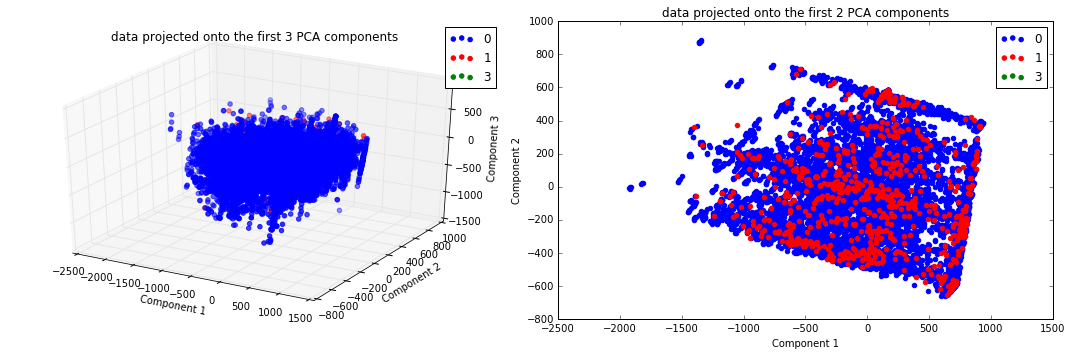

In [19]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

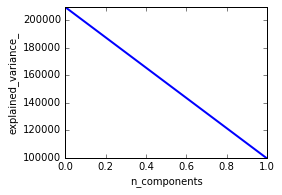

In [41]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [40]:
#gets the vector for the 0-th component
comp_0 = pca.components_[0]
#gets the vector for the 1-st component
comp_1 = pca.components_[1]

print comp_0
print comp_1

[ -9.28520079e-06  -1.03504275e-03  -9.75418707e-04 ...,  -9.32180985e-04
  -1.34328360e-03  -3.48071722e-03]
[  1.53937857e-05  -1.37108910e-03  -1.00704828e-03 ...,   4.16063699e-04
  -4.78407469e-03  -2.44218784e-02]


In [52]:
# Dump components relations with features:
# http://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
print pd.DataFrame(pca.components_,columns=ncds_data_no_indicators.columns[:-1],index = ['PC-1','PC-2'])

          n622  n0region  n1region  n2region  n3region      n553      n545  \
PC-1 -0.000009 -0.001035 -0.000975 -0.001112 -0.001377  0.000104 -0.000010   
PC-2  0.000015 -0.001371 -0.001007 -0.002308 -0.005518 -0.000055  0.000001   

          n520      n490      n492    ...          n15     n1849    dvht11  \
PC-1  0.000024  0.000372 -0.000030    ...     0.000127  0.000002 -0.000083   
PC-2 -0.000321  0.000427 -0.000056    ...    -0.000147 -0.000003 -0.000348   

        dvht16   dvrwt07   dvrwt11   dvrwt16    dvwt07    dvwt11    dvwt16  
PC-1 -0.000162 -0.003702 -0.003512 -0.006215 -0.000932 -0.001343 -0.003481  
PC-2 -0.001140  0.000457 -0.014066 -0.043260  0.000416 -0.004784 -0.024422  

[2 rows x 1739 columns]


In [59]:
pca = PCA(n_components=10)
pca.fit(x)

PCA(copy=True, n_components=10, whiten=False)

In [ ]:
print pca.explained_variance_ratio_

In [55]:
print pd.DataFrame(pca.components_,columns=ncds_data_no_indicators.columns[:-1],index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

           n622  n0region  n1region  n2region  n3region      n553      n545  \
PC-1  -0.000009 -0.001035 -0.000975 -0.001112 -0.001377  0.000104 -0.000010   
PC-2   0.000015 -0.001371 -0.001007 -0.002308 -0.005518 -0.000055  0.000001   
PC-3  -0.000026 -0.002324 -0.002852 -0.001644 -0.001088  0.000274 -0.000011   
PC-4   0.000018 -0.001343 -0.002474 -0.003286 -0.001589  0.000311  0.000013   
PC-5  -0.000024 -0.000656 -0.000260  0.002024  0.001111 -0.000379  0.000057   
PC-6  -0.000107  0.000485  0.003593  0.004069  0.003207  0.000720  0.000010   
PC-7   0.000042 -0.002829  0.000787  0.000522  0.001747  0.002513 -0.000041   
PC-8  -0.000136  0.000415 -0.007159 -0.006814 -0.008830  0.000203  0.000016   
PC-9   0.000244  0.002611  0.004511  0.002304  0.001518  0.002192  0.000008   
PC-10 -0.000338  0.001815 -0.000274 -0.000001 -0.000135  0.000439 -0.000029   

           n520      n490      n492    ...          n15     n1849    dvht11  \
PC-1   0.000024  0.000372 -0.000030    ...     0.00

In [74]:
# select 10 best features
b = fs.SelectKBest(fs.f_regression, k=10) #k is number of features.
b.fit(x_train, y_train)
# print b.get_support().shape

# filter training set to just use top 10 features

X_train = x_train[:, b.get_support()]
X_test = x_test[:, b.get_support()]

# which features did we select
print ncds_data_no_indicators.columns[b.get_support()].values

# print X_train

['n1817' 'n1818' 'n1301' 'n1394' 'n1400' 'n1452' 'n1453' 'n1502' 'n2615'
 'n2616']


## Step 2: Build Base Models

In [22]:
# Function for computing the accuracy a given model on the entire test set,
# the accuracy on class 0 in the test set
# and the accuracy on class 1
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])],
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])


In [19]:
# # KNN
# knn = KNN()
# knn.fit(x_train, y_train)
# knn_scores = score(knn, x_test, y_test)

# #Unweighted logistic regression
# unweighted_logistic = LogisticRegression()
# unweighted_logistic.fit(x_train, y_train)
# unweighted_log_scores = score(unweighted_logistic, x_test, y_test)

# #Weighted logistic regression
# weighted_logistic = LogisticRegression(class_weight='balanced')
# weighted_logistic.fit(x_train, y_train)
# weighted_log_scores = score(weighted_logistic, x_test, y_test)

# #LDA
# lda = LDA()
# lda.fit(x_train, y_train)
# lda_scores = score(lda, x_test, y_test)

# #QDA
# qda = QDA()
# qda.fit(x_train, y_train)
# qda_scores = score(qda, x_test, y_test)

# #Decision Tree
# tree = DecisionTree()
# tree.fit(x_train, y_train)
# tree_scores = score(tree, x_test, y_test)

# #Random Forest
# rf = RandomForest(class_weight='balanced')
# rf.fit(x_train, y_train)
# rf_scores = score(rf, x_test, y_test)

# # SVC
# svc = SVC(probability=True,class_weight='balanced')
# svc.fit(x_train, y_train)
# svc_scores = score(svc, x_test, y_test)

# #Score Dataframe
# score_df = pd.DataFrame({ 'knn': knn_scores, 
#                          'unweighted logistic': unweighted_log_scores,
#                          'weighted logistic': weighted_log_scores,
#                          'lda': lda_scores,
#                          'qda': qda_scores,
#                          'tree': tree_scores,
#                          'rf': rf_scores,'svc':svc_scores})
# score_df

//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,knn,lda,qda,rf,svc,tree,unweighted logistic,weighted logistic
overall accuracy,0.955954,0.965652,0.955954,0.959186,0.956358,0.952586,0.945043,0.920124
accuracy on class 0,0.999296,0.986197,0.999437,0.999577,1.000000,0.971972,0.971549,0.942113
accuracy on class 1,0.006173,0.515432,0.003086,0.074074,0.000000,0.527778,0.364198,0.438272


In [18]:
from multiprocessing.dummy import Pool as ThreadPool
# http://chriskiehl.com/article/parallelism-in-one-line/

In [20]:
def knn(mylist):
    knn = KNN()
    knn.fit(mylist[0],mylist[1])
    knn_scores = score(knn, x_test, y_test)
    return knn_scores

def lda(mylist):
    lda=LDA()
    lda.fit(mylist[0],mylist[1])
    lda_scores = score(lda, x_test, y_test)
    return lda_scores
    
def qda(mylist):
    qda=QDA()
    qda.fit(mylist[0],mylist[1])
    qda_scores = score(qda, x_test, y_test)
    return qda_scores

def tree(mylist):
    tree = DecisionTree()
    tree.fit(x_train, y_train)
    tree_scores = score(tree, x_test, y_test)
    return tree_scores

def rf(mylist):
    rf = RandomForest(class_weight='balanced')
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    return rf_scores

def svc(mylist):
    svc = SVC(probability=True,class_weight='balanced')
    svc.fit(x_train, y_train)
    svc_scores = score(svc, x_test, y_test)
    return svc_scores

In [ ]:
mylist = [(x_train,y_train)]
pool = ThreadPool(7)
knn_score = pool.map(knn,mylist)
lda_scores = pool.map(lda, mylist)
qda_scores = pool.map(qda, mylist)
svc_scores = pool.map(svc, mylist)
tree_scores = pool.map(tree, mylist)
rf_scores = pool.map(rf, mylist)

/Users/seankeery/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/seankeery/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
#Score Dataframe
score_df = pd.DataFrame({ 'knn': knn_scores, 
                         'unweighted logistic': unweighted_log_scores,
                         'weighted logistic': weighted_log_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores,
                         'rf': rf_scores,'svc':svc_scores})
score_df